In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

x_train = x_train0/255
x_test = x_test0/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
from keras.layers import Dense,Activation,Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras import optimizers

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(32,(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
__________

In [8]:
from keras.callbacks import ReduceLROnPlateau

lrfunc = ReduceLROnPlateau(monitor="val_acc",
                           patience=2,factor=0.02,
                           min_lr=0.0000001)

In [9]:
from sklearn.model_selection import train_test_split

x_Train,x_Val,y_Train,y_Val = train_test_split(x_train,y_train,test_size=0.2)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=45,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.2,
                        zoom_range=0.1,
                        data_format = 'channels_last')

In [11]:
gen.fit(x_Train)
test_gen = gen.flow(x_Train,y_Train,batch_size=300)

In [12]:
model.compile(optimizer=optimizers.Adam(lr = 0.001),
              loss='mse', metrics=['accuracy'])

In [13]:
train_history=model.fit_generator(test_gen,epochs=30,verbose=1,
                                   steps_per_epoch=300,
                                   validation_data=(x_Val,y_Val),
                                   callbacks = [lrfunc])

Epoch 1/30
300/300 [==============================] - 16s 53ms/step - loss: 0.0221 - acc: 0.8358 - val_loss: 0.0054 - val_acc: 0.9654247 - acc: - ETA: 1s - loss: 0.0 - ETA: 0s - loss: 0.0223 - acc: 0.
Epoch 2/30
300/300 [==============================] - 13s 44ms/step - loss: 0.0069 - acc: 0.9547 - val_loss: 0.0055 - val_acc: 0.96552
Epoch 3/30
300/300 [==============================] - 13s 44ms/step - loss: 0.0049 - acc: 0.9681 - val_loss: 0.0028 - val_acc: 0.9823
Epoch 4/30
300/300 [==============================] - 13s 44ms/step - loss: 0.0038 - acc: 0.9749 - val_loss: 0.0025 - val_acc: 0.9831
Epoch 5/30
300/300 [==============================] - 13s 45ms/step - loss: 0.0035 - acc: 0.9776 - val_loss: 0.0026 - val_acc: 0.9834cc: 0.9 -  - ETA: 0s - loss: 0.0035 - acc: 0.9
Epoch 6/30
300/300 [==============================] - 13s 45ms/step - loss: 0.0031 - acc: 0.9801 - val_loss: 0.0025 - val_acc: 0.9839A: 4s - loss:  - ETA: 2s - loss: 0.0031 - - ETA: 1s - loss: 0.0031 - a - ETA: 1s - 

In [14]:
def show_train_history(train_history, label1, label2):
    plt.plot(train_history.epoch,train_history.history[f'{label1}'],label=f'{label1}')
    plt.plot(train_history.epoch,train_history.history[f'{label2}'],label=f'{label2}')
    plt.legend(loc = 'best')    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training history')

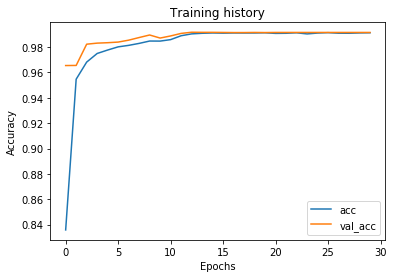

In [15]:
show_train_history(train_history,'acc','val_acc')

In [16]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix,title):
    plt.figure()
    plt.imshow(cm)
    plt.colorbar()
    plt.ylabel("True")
    plt.xlabel("Predict")
    x=cm.shape[1]
    y=cm.shape[0]
    plt.xlim(-0.5,-0.5+x)
    plt.ylim(-0.5+y,-0.5)
    plt.xticks(np.arange(0,x,1))
    plt.yticks(np.arange(x-1,-1,-1))
    plt.tight_layout()
    plt.title(f'{title}')

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(i,j,cm[j][i],horizontalalignment = 'center',
                     color = 'red',fontsize=9)

In [17]:
predict = model.predict(x_test)

In [18]:
cm = confusion_matrix(y_test.argmax(axis=1),predict.argmax(axis=1))

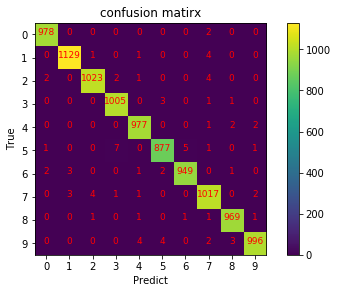

In [19]:
plot_confusion_matrix(cm,'confusion matirx')

In [20]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 68us/step


[0.0012486746209466166, 0.992]